# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\gideo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


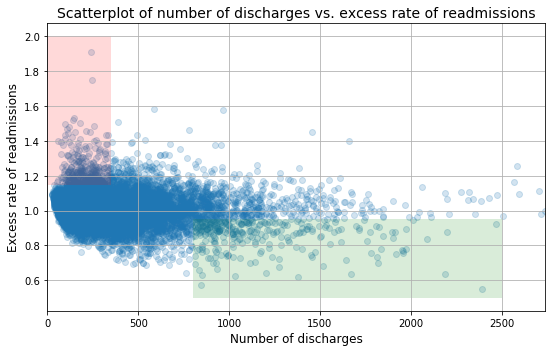

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
display(hospital_read_df.shape)
display(hospital_read_df.head())
display(hospital_read_df.info())

(16860, 12)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


None

Let's analyze each claim in turn:

*1. Overall, rate of readmissions is trending down with increasing number of discharges*

First, we perform linear regression on the data:

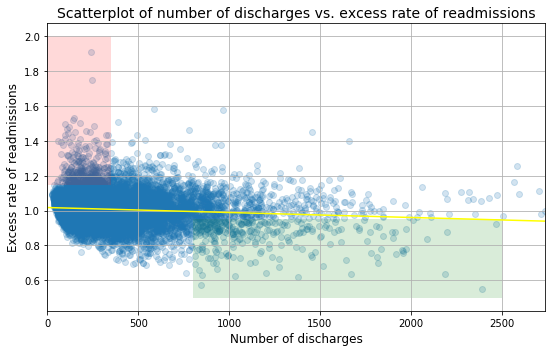

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

m, b = np.polyfit(x, y, 1)
x2 = np.array([0, max(x)])
y2 = m*x2 + b
_ = plt.plot(x2,y2, color='yellow')
plt.show()

In [7]:
print('slope =', m, 'excess rate of readmissions / discharge')
print('intercept =', b, 'excess rate of readmissions')

slope = -2.8565052943822905e-05 excess rate of readmissions / discharge
intercept = 1.0179475579544215 excess rate of readmissions


Our results show a negative slope. Next, we calculate a confidence interval on that slope:

In [8]:
# Pairs Bootstrap to find confidence interval on the slope
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initizlize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = np.asarray(x)[bs_inds], np.asarray(y)[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

In [9]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x, y, 10000)

In [10]:
# Compute and print the 95% CI for the slope
print(np.percentile(bs_slope_reps, 99))

-2.0364820233191857e-05


In [11]:
print(np.percentile(bs_slope_reps, 100))

-1.6098892523869797e-05


Using a bootstrap test for the slope of our data, we get that 99% of our slopes are greater than about -2.05e-05 and our largest slope is about -1.48e-05. 

C:\Users\gideo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


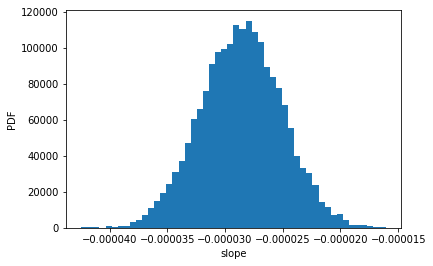

In [12]:
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

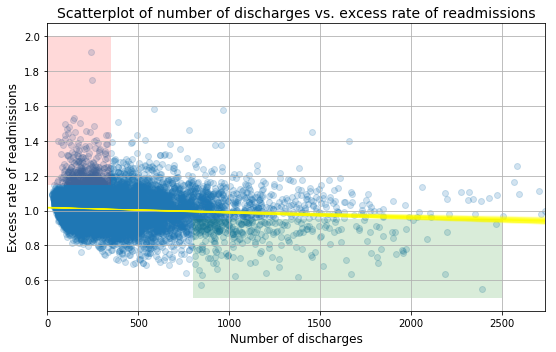

In [13]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Generate array of x-values for bootstrap lines
x3 = np.array([0, max(x)])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x3, bs_slope_reps[i]*x3 + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='yellow')
    
# Plot the data
#_ = plt.plot(x, y, marker='.', linestyle='none')
#fig, ax = plt.subplots(figsize=(8,5))
#ax.scatter(x, y,alpha=0.2)

# Label the axes, set the margins, and show the plot
#_ = plt.xlabel('discharges')
#_ = plt.ylabel('excess readmission ratio')
#plt.margins(0.02)
plt.show()


When we plot a line of best fit through the data, we find that we have a negative slope of about -2.86e-05 or a rate of readmission that is 2.86e-05 smaller with each additional discharge. Our intercept is about 1.02 indicating that that is our baseline and each additional discharge should result in a rate of readmission less that that. If we plug our greatest discharge number into the equation for the line, we get a rate of readmission of 0.94. So overall, the line extends from a rate of readmission of about 1.02 to about 0.94. 

When we calculated a confidence interval on the slope, we found that all values were greater than 0. While this isn't a formal hypothesis test, it does give us a very high degree of confidence that the slope of the line is truly negative.

So the claim that the rate of readmissions goes down with discharges is true. 

*2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)*

What we are asked to determine is if there is a greater incidince of excess rate of readmissions for a "lower number" of readmissions than for a 'higher number' of readmissions. Here, we will take discharges of 350 and fewer to constitute a "lower number" and discharges of more than 350 to constitute a 'higher number'. This is because the red shaded region includes discharges of 350 and fewer. We will also use the graph's definition of "excess rate of readmissions", which is 1.15 and above.

In [14]:
df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]

In [15]:
high_numb_small = np.sum(df[df['Number of Discharges'] <= 350]['Excess Readmission Ratio'] >= 1.15)
total_small = len(df[df['Number of Discharges'] <= 350])
high_rate_small = high_numb_small / total_small

In [16]:
high_numb_large = np.sum(df[df['Number of Discharges'] > 350]['Excess Readmission Ratio'] >= 1.15)
total_large = len(df[df['Number of Discharges'] > 350])
high_rate_large = high_numb_large / total_large

In [17]:
high_rate_small

0.050078470537879866

In [18]:
high_rate_large

0.05997770345596432

Although there are a greater number of small hospitals that have a high rate of readmission, it is also true that there are a greater number of small hospitals. When we calculate the rate of high rates of readmission for small and large hospitals, there is actually a **larger** rate for large hospitals, because there are far fewer large hospitals. So about 5% of small hospitals have high rates of readmission, but about 6% of large hospitals do.

So the claim that 'with a "lower number of discharges, there is a greater incidence of excess rate of readmissions"' is incorrect. There is a larger absolute number of readmissions, and the rate is made to look higher than it is because the total number of small hospitals is obscured by the fact that the small hospitals overlap on the graph.

*3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)*

This claim is similar to the last so we will evaluate it in the same manner. We will use a "higher number of discharges" to mean discharges of 800 or more and a lower rate to mean less than 800. Similarly, we will use a lower rate to mean readmission of between 0.5 and 0.95.

In [19]:
low_numb_small = np.sum(df[df['Number of Discharges'] < 800]['Excess Readmission Ratio'] <= 0.95)
total_small = len(df[df['Number of Discharges'] < 800])
low_rate_small = low_numb_small / total_small
low_rate_small

0.2312629790447423

In [20]:
low_numb_large = np.sum(df[df['Number of Discharges'] >= 800]['Excess Readmission Ratio'] <= 0.95)
total_large = len(df[(df['Number of Discharges'] >= 800)])
low_rate_large = low_numb_large / total_large
low_rate_large

0.33444444444444443

Therefore, it does indeed appear to be the case that hospitals with 800 discharges or more have a greater incidince of lower rates of readmission. About a third of all hospital with 800 or more discharges have small readmission rates, and only about 23% of hospitals with fewer than 800 discharges have small readmission rates.

*4. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1*

In [21]:
df[(df['Number of Discharges'] < 100)].mean()

Number of Discharges        74.717172
Excess Readmission Ratio     1.022618
dtype: float64

In [22]:
less_than_100 = df[(df['Number of Discharges'] < 100)]

In [23]:
np.sum(less_than_100['Excess Readmission Ratio'] > 1)/len(less_than_100)

0.6321548821548821

This claim is True.

*5. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1*

In [24]:
greater_than_1000 = df[(df['Number of Discharges'] > 1000)]

In [25]:
greater_than_1000.mean()

Number of Discharges        1361.269565
Excess Readmission Ratio       0.979073
dtype: float64

In [26]:
np.sum(greater_than_1000['Excess Readmission Ratio'] > 1)/len(greater_than_1000)

0.44565217391304346

These claims are slightly off. The mean readmission rate for hospitals/facilities with more than 1,000 discharges is 97.9% and about 44.6% (which rounds to 45%) of them have excess readmission greater than 1.

*6. There is a significant correlation between hospital capacity (number of discharges) and readmission rates.*

To evaluate this claim, we should conduct a correlation test:

In [27]:
def pearson_r(x, y):
    """Compute pearson correlation coefficient between 2 arrays"""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

In [28]:
r_obs = pearson_r(df['Number of Discharges'], df['Excess Readmission Ratio'])
r_obs

-0.09309554287590442

We find a correlation of about -0.09. It is hard to say that this is a significant correlation, in the sense of it being practically significant. At best, it is a weak negative correlation. 

It might be significant in the statistical sense though. To test that, we will permute the data among the variables and observe the correlations that result. Our nully hypothesis is that the correlation between discharges and readmission rate is 0.

In [29]:
# Initialize permutation replicates: perm_replicates
np.random.seed(42)
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute 'Excess Readmission Ratio': ratio_permuted
    ratio_permuted = np.random.permutation(df['Excess Readmission Ratio'])
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(df['Number of Discharges'], ratio_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= abs(r_obs)) / len(perm_replicates)
print('p-val = ', p )


p-val =  0.0


In [30]:
# Compute p-value: p
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val = ', p )

p-val =  0.0


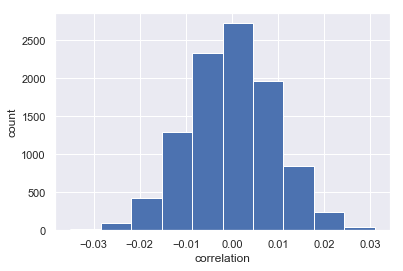

In [31]:
sns.set()
plt.hist(perm_replicates)
plt.xlabel('correlation')
plt.ylabel('count')
plt.show()

We achieve a p-value of 0 using bootstrapping and assuming a null hypothesis that the correlation is equal to 0. That certainly passes the significance test for alpha = 1% (or any value), so we conclude that the correlation between discharge and rate of readmission is statistically significant and weakly negative.

*7. Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.*

This may be true, although we need a way to assess this. We would need data on the resources provided to each hospital. Since our dataset does not include such data, we can't conclude that this is the reason, even if it is very plausible.

*8.Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.*

This claim is similar to the last one in that assumes that the higher rate of readmissions in smaller hospitals is due to a low quality of resource allocation in them. While that idea is very logical and plausible, we cannot support it based on the data that we have available. Furthermore, even if we could show that the higher readmission rate was due to poor resource allocation, it might not follow that hospitals should be required to demonstrate a higher level of resource allocation. Such resource allocation may not be possible for the hospital due to, ironically, a lack of resources, be they capital (human and non-human) or labor. That is, a small hospital may be operating at its optimal capacity, which is still poor resource allocation when compared to a larger hospital. Having the hospital upgrade resource allocation may be too high a cost in other areas. Finally, even if we could upgrade the resource allocation in many of these small hospitals at minimal cost, it still might not be smart to cease operations in the small hospitals that are unable to improve their resource allocation. After all, it might be far worse to many people to have no hospital in their town than a small hospital with a poor readmission rate. 

In sum, policy making is multi-faceted and is aided with good statistics, but simple statistical analyses cannot always provide simple policy answers.

*9. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.*

This claim can be analyzed in much the same way that we analyzed the previous 2 claims: in short, we don't have enough information to support this policy perscription. If our only goal is to decrese the rate of readmission, then consolidating hospitals does seem like a proper step to take. However, if our goal is to provide patients with healthcare, then it might not be a smart step to take. After all, it is quite possible, even likely, that many of the smaller hospitals with higher readmission rates serve patients with no other hospitals near them. Removing the hospital from their vicinity by consolidating it with another hospital elsewhere would deprive them of easy access to healthcare. While the quality of the healthcare they receive might not be as good as what they would receive in a bigger hospital, a safe assumption to make is that it is better than no healthcare. And if we also assume that many of the patients currently being serviced by the small hospitals would not choose to go to farther hospitals, or perhaps would not be able to get their promptly, which is a reasonable assumption, than closing down hospitals by consolidating them does not seem like a good idea.

To reiterate, policy making is complicated, and simple statistical analyses cannot often be used to answer complex policy questions.

    Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

Advantages: 
1. Allows one to observe the relationship between 2 variables fairly easily 
2. Contains almost all the information

Disadvantages: 
1. Many of the data points overlap at the lower end of discharges, so it is hard to see how many such points there are
2. Some of the data (the 3 largest discharge points) are excluded


We could do a number of other things here, such as using beeswarm plots or box/violin plots of readmission rate, where the plots are segmented by age. The problem with this is that the segmentation is somewhat arbitrary, so it could distort our analysis.

Alternatively, we could re-do the scatterplot, but add a density coloring to take care of the disadvantage of our initial plot. That is plotted below. This is similar to a 2D histogram or a hexbinning.

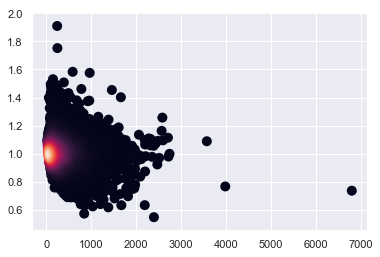

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

Or we could use this plot, which shows the number of discharges on a logarithmic scale, thereby showing more of the points that were at the lower end of used scatterplot. It also includes the 3 largest points that were excluded.

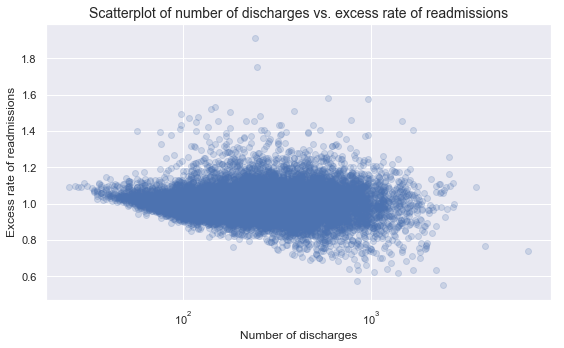

In [33]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

fig, ax = plt.subplots(figsize=(8,5))
_ = ax.scatter(x, y,alpha=0.2)

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

#_ = ax.set_xlim([0, 8000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges', fontsize=12)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()